In [ ]:
from keras.saving.save import load_model

best_mlp = load_model('/content/drive/MyDrive/Project/Best-MLP')

In [119]:
import pandas as pd
import numpy as np

train_data = np.array(pd.read_csv('/content/drive/MyDrive/Project/observed-generated-and-original-test-data.csv', header=None))
test_data = np.array(pd.read_csv('/content/drive/MyDrive/Project/observed-test-data.csv', header=None))

x_train, x_test, y_train, y_test = train_data[:, [i for i in range(9)]], test_data[:, [i for i in range(9)]], train_data[:, [9]], test_data[:, [9]]

In [120]:
from sklearn.preprocessing import PowerTransformer

x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

bc_x = PowerTransformer('box-cox', standardize=True)
bc_y = PowerTransformer('box-cox', standardize=True)

bc_x.fit(x)
bc_y.fit(y)

x = bc_x.transform(x)
y = bc_y.transform(y)

x_train, x_test, y_train, y_test = x[:len(train_data)], x[len(train_data):], y[:len(train_data)], y[len(train_data):]

In [121]:
# Only Original Observed Values in Train
x_train = x_train[:470]
y_train = y_train[:470]

In [122]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

trainpreds = best_mlp.predict(x_train)
print('Train R-squared:', r2_score(bc_y.inverse_transform(y_train), bc_y.inverse_transform(trainpreds)))
print('Train MRE:', mean_absolute_percentage_error(bc_y.inverse_transform(y_train), bc_y.inverse_transform(trainpreds)))

testpreds = best_mlp.predict(x_test)
print('Test R-squared:', r2_score(bc_y.inverse_transform(y_test), bc_y.inverse_transform(testpreds)))
print('Test MRE:', mean_absolute_percentage_error(bc_y.inverse_transform(y_test), bc_y.inverse_transform(testpreds)))

Train R-squared: 0.9286618440538227
Train MRE: 0.07873563107888852
Test R-squared: 0.6763181521923336
Test MRE: 0.2084261945615591


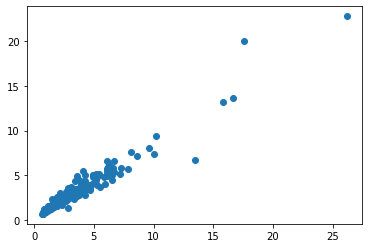

In [123]:
plt.scatter(bc_y.inverse_transform(y_train), bc_y.inverse_transform(trainpreds))

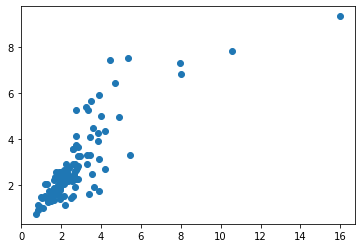

In [124]:
plt.scatter(bc_y.inverse_transform(y_test), bc_y.inverse_transform(testpreds))

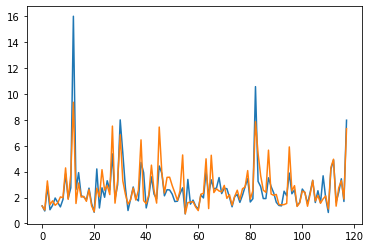

In [125]:
plt.plot(bc_y.inverse_transform(y_test))
plt.plot(bc_y.inverse_transform(testpreds))